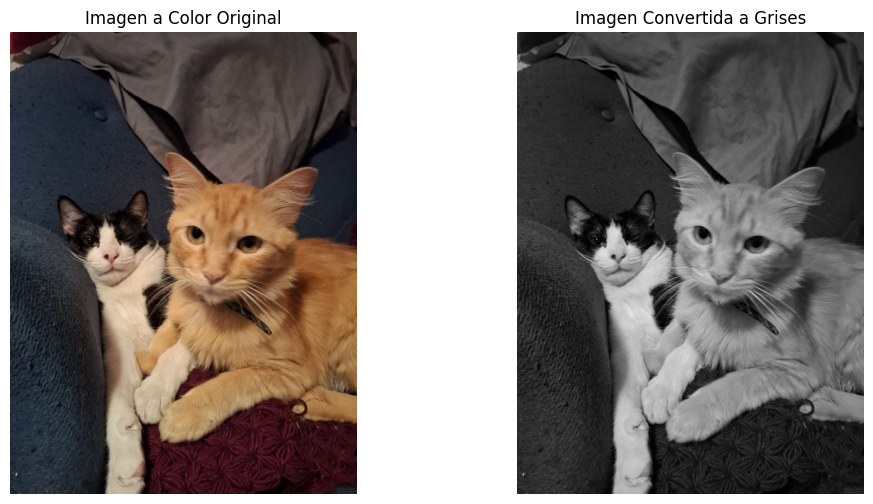

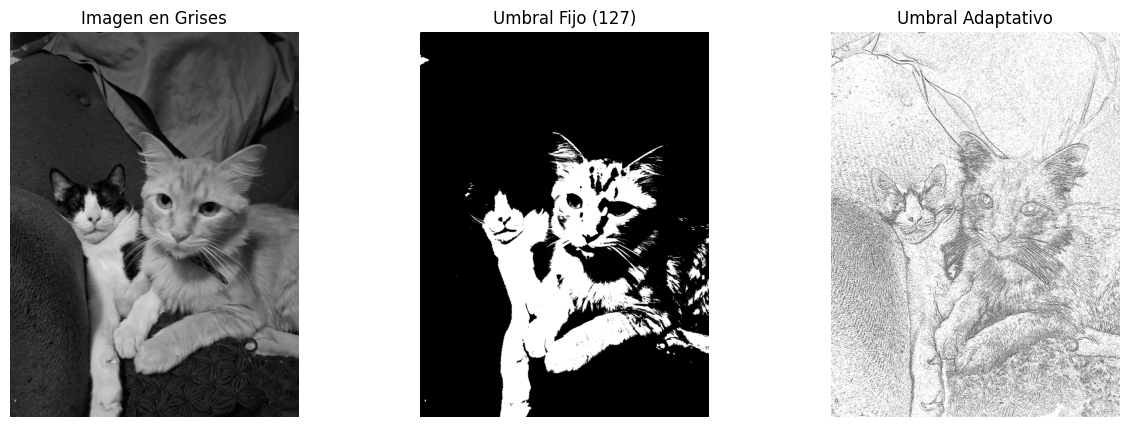

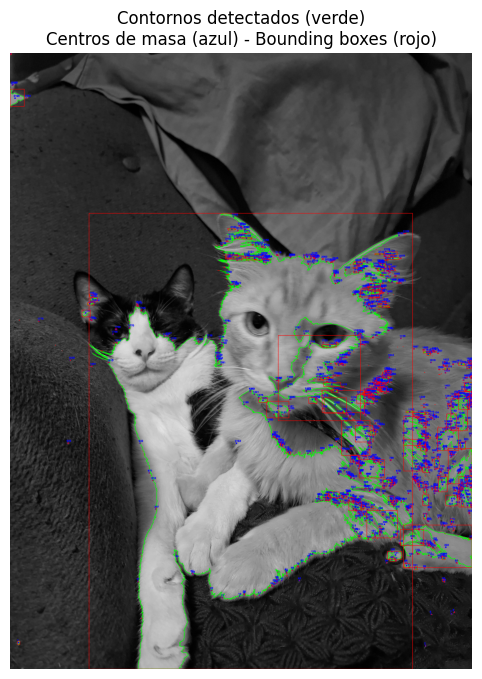


--- Métricas de las formas detectadas ---
Número de formas detectadas: 2199
Área promedio: 1278.11 píxeles
Perímetro promedio: 44.48 píxeles


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow  # Solo necesario para Colab

# Cargar imagen a color
image_path = '/content/MichiJuanP2.jpg'  # Cambia esto por la ruta de tu imagen
color_image = cv2.imread(image_path)

# Verificar que la imagen se cargó correctamente
if color_image is None:
    print("Error: No se pudo cargar la imagen. Verifica la ruta.")
else:
    # Convertir a escala de grises
    gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

    # Mostrar imágenes original y en grises
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
    plt.title('Imagen a Color Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Imagen Convertida a Grises')
    plt.axis('off')

    plt.show()

    ## Segmentación binaria

    # Umbral fijo
    _, thresh_fixed = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

    # Umbral adaptativo
    thresh_adaptive = cv2.adaptiveThreshold(gray_image, 255,
                                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                          cv2.THRESH_BINARY, 11, 2)

    # Mostrar resultados de segmentación
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Imagen en Grises')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(thresh_fixed, cmap='gray')
    plt.title('Umbral Fijo (127)')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(thresh_adaptive, cmap='gray')
    plt.title('Umbral Adaptativo')
    plt.axis('off')

    plt.show()

    ## Detección de contornos (usaremos la imagen con umbral fijo)

    # Encontrar contornos
    contours, _ = cv2.findContours(thresh_fixed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Crear una copia de la imagen original para dibujar los contornos
    contour_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

    # Variables para métricas
    total_area = 0
    total_perimeter = 0
    num_shapes = len(contours)

    # Procesar cada contorno
    for i, contour in enumerate(contours):
        # Calcular momentos para el centro de masa
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
        else:
            cX, cY = 0, 0

        # Dibujar el centro
        cv2.circle(contour_image, (cX, cY), 5, (255, 0, 0), -1)
        cv2.putText(contour_image, f"{i+1}", (cX - 10, cY - 10),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        # Calcular y dibujar bounding box
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(contour_image, (x, y), (x + w, y + h), (0, 0, 255), 2)

        # Calcular área y perímetro
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)

        total_area += area
        total_perimeter += perimeter

    # Mostrar imagen con contornos, centros y bounding boxes
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
    plt.title('Contornos detectados (verde)\nCentros de masa (azul) - Bounding boxes (rojo)')
    plt.axis('off')
    plt.show()

    # Calcular métricas promedio
    avg_area = total_area / num_shapes if num_shapes > 0 else 0
    avg_perimeter = total_perimeter / num_shapes if num_shapes > 0 else 0

    # Mostrar métricas
    print("\n--- Métricas de las formas detectadas ---")
    print(f"Número de formas detectadas: {num_shapes}")
    print(f"Área promedio: {avg_area:.2f} píxeles")
    print(f"Perímetro promedio: {avg_perimeter:.2f} píxeles")